In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv('gurgaon_properties_post_feature_selection_v2.csv').drop(columns=['store room','floor_category','balcony'])

In [19]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,flat,sector 36,0.82,3.0,2.0,New Property,850.0,0.0,0.0,Low
1,flat,sector 89,0.95,2.0,2.0,New Property,1226.0,1.0,0.0,Low
2,flat,sohna road,0.32,2.0,2.0,New Property,1000.0,0.0,0.0,Low
3,flat,sector 92,1.60,3.0,4.0,Relatively New,1615.0,1.0,1.0,High
4,flat,sector 102,0.48,2.0,2.0,Relatively New,582.0,0.0,0.0,High


In [20]:
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

In [21]:
# Numerical = bedRoom, bathroom, built_up_area, servant room
# Ordinal = property_type, furnishing_type, luxury_category 
# OHE = sector, agePossession

In [22]:
df['agePossession'] = df['agePossession'].replace(
    {
        'Relatively New':'new',
        'Moderately Old':'old',
        'New Property' : 'new',
        'Old Property' : 'old',
        'Under Construction' : 'under construction'
    }
)

In [23]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,flat,sector 36,0.82,3.0,2.0,new,850.0,0.0,0.0,Low
1,flat,sector 89,0.95,2.0,2.0,new,1226.0,1.0,0.0,Low
2,flat,sohna road,0.32,2.0,2.0,new,1000.0,0.0,0.0,Low
3,flat,sector 92,1.60,3.0,4.0,new,1615.0,1.0,1.0,High
4,flat,sector 102,0.48,2.0,2.0,new,582.0,0.0,0.0,High


In [24]:
df['property_type'] = df['property_type'].replace({'flat':0,'house':1})

C:\Users\gudiv\AppData\Local\Temp\ipykernel_19292\71934247.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['property_type'] = df['property_type'].replace({'flat':0,'house':1})


In [25]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,0,sector 36,0.82,3.0,2.0,new,850.0,0.0,0.0,Low
1,0,sector 89,0.95,2.0,2.0,new,1226.0,1.0,0.0,Low
2,0,sohna road,0.32,2.0,2.0,new,1000.0,0.0,0.0,Low
3,0,sector 92,1.60,3.0,4.0,new,1615.0,1.0,1.0,High
4,0,sector 102,0.48,2.0,2.0,new,582.0,0.0,0.0,High


In [26]:
df['luxury_category'] = df['luxury_category'].replace({'Low':0,'Medium':1,'High':2})

C:\Users\gudiv\AppData\Local\Temp\ipykernel_19292\2576796079.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['luxury_category'] = df['luxury_category'].replace({'Low':0,'Medium':1,'High':2})


In [27]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,0,sector 36,0.82,3.0,2.0,new,850.0,0.0,0.0,0
1,0,sector 89,0.95,2.0,2.0,new,1226.0,1.0,0.0,0
2,0,sohna road,0.32,2.0,2.0,new,1000.0,0.0,0.0,0
3,0,sector 92,1.60,3.0,4.0,new,1615.0,1.0,1.0,2
4,0,sector 102,0.48,2.0,2.0,new,582.0,0.0,0.0,2


In [28]:
new_df = pd.get_dummies(df,columns=['sector','agePossession'],drop_first=True)

In [29]:
X = new_df.drop(columns=['price'])
y = new_df['price']

In [30]:
y_log = np.log1p(y)

In [31]:
y_log

0       0.598837
1       0.667829
2       0.277632
3       0.955511
4       0.392042
          ...   
3549    0.314811
3550    1.945910
3551    0.470004
3552    2.803360
3553    1.022451
Name: price, Length: 3554, dtype: float64

In [32]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [34]:
X_scaled

,property_type,bedRoom,bathroom,built_up_area,servant room,furnishing_type,luxury_category,sector_gwal pahari,sector_manesar,sector_sector 1,...,sector_sector 9,sector_sector 90,sector_sector 91,sector_sector 92,sector_sector 93,sector_sector 95,sector_sector 99,sector_sohna road,agePossession_old,agePossession_under construction
0,-0.517180,-0.074329,-0.874300,-0.831662,-0.747968,-0.668281,-0.984642,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
1,-0.517180,-0.877269,-0.874300,-0.522517,1.336956,-0.668281,-0.984642,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
2,-0.517180,-0.877269,-0.874300,-0.708333,-0.747968,-0.668281,-0.984642,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,4.561105,-0.602271,-0.290738
3,-0.517180,-0.074329,0.505173,-0.202684,1.336956,1.037949,1.866207,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,5.877074,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
4,-0.517180,-0.877269,-0.874300,-1.052010,-0.747968,-0.668281,1.866207,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,-0.517180,-0.877269,-0.874300,-1.093119,-0.747968,-0.668281,0.440783,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
3550,1.933563,1.531549,1.194909,3.590095,1.336956,-0.668281,1.866207,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
3551,-0.517180,-1.680208,-1.564036,-0.983768,-0.747968,1.037949,0.440783,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,1.660383,-0.290738
3552,1.933563,1.531549,1.884645,2.983317,1.336956,-0.668281,0.440783,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,1.660383,-0.290738


In [35]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_scaled, y_log, cv=kfold, scoring='r2')

In [36]:
scores.mean(),scores.std()

(0.8512613057405425, 0.016992929105286207)

In [37]:
lr = LinearRegression()
ridge = Ridge(alpha=0.0001)

In [38]:
lr.fit(X_scaled,y_log)

LinearRegression()

In [39]:
ridge.fit(X_scaled,y_log)

Ridge(alpha=0.0001)

In [40]:
coef_df = pd.DataFrame(ridge.coef_.reshape(1,112),columns=X.columns).stack().reset_index().drop(columns=['level_0']).rename(columns={'level_1':'feature',0:'coef'})

In [41]:
coef_df

,feature,coef
0,property_type,0.120165
1,bedRoom,0.054002
2,bathroom,0.065119
3,built_up_area,0.210638
4,servant room,0.050946
...,...,...
107,sector_sector 95,-0.025222
108,sector_sector 99,-0.010312
109,sector_sohna road,-0.029515
110,agePossession_old,-0.007900


In [42]:
# 1. Import necessary libraries
import statsmodels.api as sm

# 2. Add a constant to X
X_with_const = sm.add_constant(X_scaled)

# 3. Fit the model
model = sm.OLS(y_log, X_with_const).fit()

# 4. Obtain summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     196.7
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:07:41   Log-Likelihood:                 588.22
No. Observations:                3554   AIC:                            -950.4
Df Residuals:                    3441   BIC:                            -252.6
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [43]:
y_log.std()

0.5579613263072782

In [44]:
X_scaled['bedRoom'].std()

1.0001407162464122

In [45]:
0.21 * (0.557/1)

0.11697

In [46]:
np.expm1(0.030)

0.030454533953516858

In [47]:
2.4726962617564903e-05 * 100

0.0024726962617564905

C:\Users\gudiv\AppData\Local\Temp\ipykernel_19292\3746493229.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['property_type'] = df['property_type'].replace({'flat':0, 'house':1})
C:\Users\gudiv\AppData\Local\Temp\ipykernel_19292\3746493229.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['luxury_category'] = df['luxury_category'].replace({'Low':0, 'Medium':1, 'High':2})
c:\Users\gudiv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during trans

Best alpha: {'model__alpha': 0.1}
Best CV RMSE: 0.2148


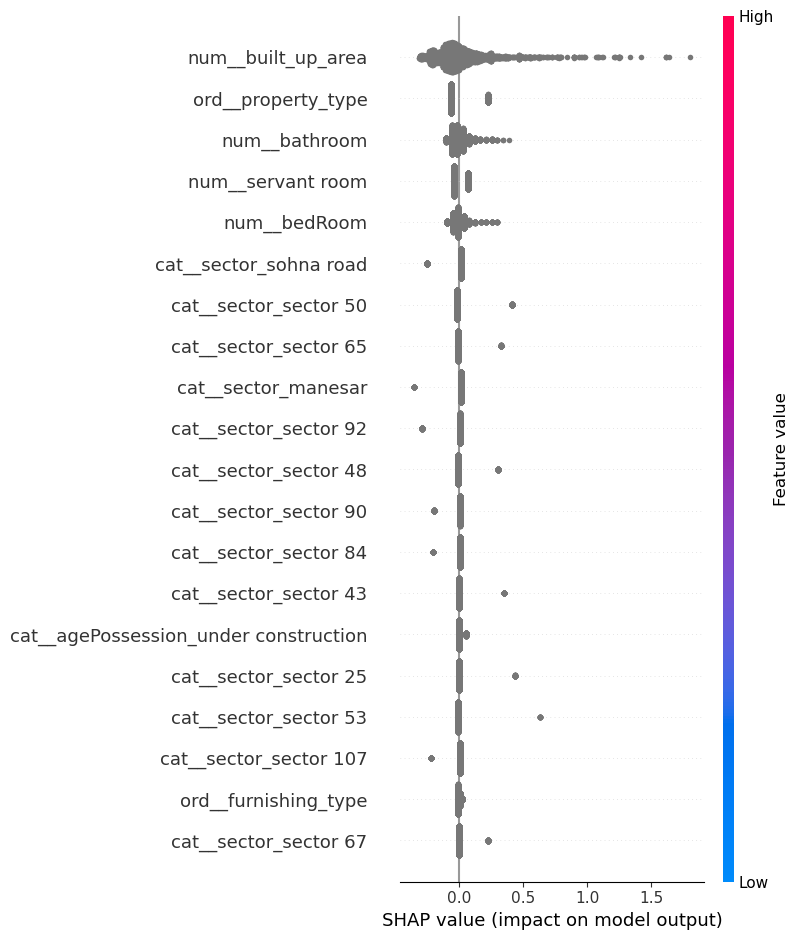

In [48]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import shap

# Load and preprocess
df = pd.read_csv('gurgaon_properties_post_feature_selection_v2.csv').drop(columns=['store room','floor_category','balcony'])

df['agePossession'] = df['agePossession'].replace({
    'Relatively New':'new',
    'Moderately Old':'old',
    'New Property':'new',
    'Old Property':'old',
    'Under Construction':'under construction'
})
df['property_type'] = df['property_type'].replace({'flat':0, 'house':1})
df['luxury_category'] = df['luxury_category'].replace({'Low':0, 'Medium':1, 'High':2})

# Split features and target
X = df.drop(columns=['price'])
y = np.log1p(df['price'])  # log-transformed target

# Feature groups
numerical_features = ['bedRoom', 'bathroom', 'built_up_area', 'servant room']
ordinal_features = ['furnishing_type', 'property_type', 'luxury_category']
categorical_features = ['sector', 'agePossession']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('ord', OrdinalEncoder(), ordinal_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())  # Can change to LinearRegression()
])

# Grid Search for best Ridge alpha
param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X, y)

print(f"Best alpha: {grid.best_params_}")
print(f"Best CV RMSE: {-grid.best_score_:.4f}")

# Fit best model
best_model = grid.best_estimator_
best_model.fit(X, y)

# SHAP Interpretation
X_transformed = best_model.named_steps['preprocessor'].transform(X)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.Explainer(best_model.named_steps['model'], X_transformed)
shap_values = explainer(X_transformed)

shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names)


In [50]:
from sklearn.metrics import r2_score

# Predict on whole dataset
y_pred_log = best_model.predict(X)
y_pred = np.expm1(y_pred_log)
y_actual = df['price']

print(f"MAE: {mean_absolute_error(y_actual, y_pred):,.2f}")
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2_score(y_actual, y_pred):.3f}")


MAE: 0.64
RMSE: 1.54
R² Score: 0.696


In [51]:
import joblib

# Save the trained pipeline (preprocessor + Ridge)
joblib.dump(best_model, 'ridge_price_model.pkl')

['ridge_price_model.pkl']